In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import sys
import os
import time


import mlflow
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import xgboost as xgb
from lightgbm import LGBMClassifier

In [2]:
df1 = pd.read_excel("train1.xlsx")
df1.head()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,RVOwner_50-100,RVOwner_100-200,RVOwner_200-300,RVOwner_300-400,RVOwner_400+,RVOwner_11-20,RVOwner_21-30,RVOwner_31-40,RVOwner_40+,RVOwner_Top 10
0,3000002,24.00,219,22,0.25,0,0.0,-157,-19.0,0.7,...,0,0,0,0,0,0,0,0,1,0
1,3000010,16.99,10,17,0.00,0,0.0,-4,0.0,0.3,...,0,0,0,0,0,0,0,0,1,0
2,3000014,38.00,8,38,0.00,0,0.0,-2,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,3000022,82.28,1312,75,1.24,0,0.0,157,8.1,52.0,...,0,0,0,0,0,0,0,0,1,0
4,3000026,17.14,0,17,0.00,0,0.0,0,-0.2,0.0,...,0,0,0,0,0,0,0,0,1,0


In [3]:
# dropping the customerid
df1.drop(['CustomerID'], axis=1, inplace=True)
df1.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,RVOwner_50-100,RVOwner_100-200,RVOwner_200-300,RVOwner_300-400,RVOwner_400+,RVOwner_11-20,RVOwner_21-30,RVOwner_31-40,RVOwner_40+,RVOwner_Top 10
0,24.00,219,22,0.25,0,0.0,-157,-19.0,0.7,0.7,...,0,0,0,0,0,0,0,0,1,0
1,16.99,10,17,0.00,0,0.0,-4,0.0,0.3,0.0,...,0,0,0,0,0,0,0,0,1,0
2,38.00,8,38,0.00,0,0.0,-2,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,82.28,1312,75,1.24,0,0.0,157,8.1,52.0,7.7,...,0,0,0,0,0,0,0,0,1,0
4,17.14,0,17,0.00,0,0.0,0,-0.2,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
# Train Test Split
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve


# split the dataset into independent and dependent data
X = df1.drop('Churn', axis=1)
Y = df1['Churn']


# performing the split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                   test_size=0.30,
                                                   random_state=1,
                                                   stratify = Y)

# Functions for Model Performance

In [5]:
def model_performance(model_name,
                      x_train_data,
                      y_train_data, 
                      x_test_data,
                      y_test_data,): 

    train_preds = model_name.predict(x_train)
    test_preds= model_name.predict(x_test)
    
    a = classification_report(y_train_data, train_preds)
    b = classification_report(y_test_data, test_preds)
    
    c = round(model_name.score(x_train_data, y_train_data),4)
    d = round(model_name.score(x_test_data, y_test_data),4)
    
    print('classification report for training data')
    print(a)
    print('\n')
    print('classification report for testing data')
    print(b)
    print('\n')
    print('the model score for training data is ',c)
    print('the model score for testing data is ',d)
    print('\n')
    
    
    from seaborn import heatmap
    fig, axes = plt.subplots(ncols=2)
    fig.set_size_inches(10,5)

    sns.heatmap(confusion_matrix(y_test_data, test_preds), annot=True, cbar=False, fmt='d')
    plt.xlabel('predicted labels')
    plt.ylabel('actual labels')
    plt.title('Confusion Matrix for Testing Data')
    plt.subplot(1,2,1)

    sns.heatmap(confusion_matrix(y_train_data, train_preds), annot=True, cbar=False, fmt='d')
    plt.xlabel('predicted labels')
    plt.ylabel('actual labels')
    plt.title('Confusion Matrix for Training Data')
    plt.subplot(1,2,2)

In [6]:
# ROC AUC Plots
def roc_score_auc_curve(model_name,
                       x_train_data,
                       y_train_data, 
                       x_test_data,
                       y_test_data):
    
    train_preds = model_name.predict(x_train)
    test_preds= model_name.predict(x_test)

    
    a = round(roc_auc_score(y_train_data,model_name.predict_proba(x_train_data)[:,1]),4)
    b = round(roc_auc_score(y_test,model_name.predict_proba(x_test_data)[:,1]),4)
    print('AUC Score for Model on Training Data is',a)
    print('AUC Score for Model on Testing Data is',b)
    
    plt.figure(figsize=(12,7))
    
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train_data, model_name.predict_proba(x_train_data)[:,1])
    plt.plot([0,1],[0,1], linestyle='--', color='g')
    plt.plot(train_fpr, train_tpr, marker='.') 
  

    test_fpr, test_tpr, test_thresholds = roc_curve(y_test_data, model_name.predict_proba(x_test_data)[:,1])
    plt.plot([0,1],[0,1], linestyle='--', color='g')
    plt.plot(test_fpr, test_tpr, marker='o') 
    
# roc_score_auc_curve(mod7, x_train, y_train, train_pred_mod7, x_test, y_test, test_pred_mod7)

In [7]:
# K-Fold Cross Validation Functions

def k_fold_cross_valscore(model_name,
                          x_train_data,
                          y_train_data,
                          folds
                         ):
    from sklearn.model_selection import cross_val_score
    import pandas as pd
    
    model_kfold_recall = cross_val_score(model_name, x_train_data, y_train_data,cv=folds, scoring='recall', verbose=0)
    model_kfold_accuracy = cross_val_score(model_name, x_train_data, y_train_data,cv=folds, scoring='accuracy', verbose=0)
    model_kfold_precision = cross_val_score(model_name, x_train_data, y_train_data,cv=folds, scoring='precision', verbose=0)
    model_kfold_f1 = cross_val_score(model_name, x_train_data, y_train_data,cv=folds, scoring='f1', verbose=0)
    
    a = pd.DataFrame(model_kfold_recall)
    b = pd.DataFrame(model_kfold_accuracy)
    c = pd.DataFrame(model_kfold_precision)
    d = pd.DataFrame(model_kfold_f1)

    cross_val_data = pd.concat([a,b,c,d], ignore_index=True, axis=1)
    cross_val_data.rename(columns={0:"Recall", 1:"Accuracy", 2:"Precision",3:"F1 Score"},
                        inplace=True)
       
   
    print('\n')
    print("The mean recall for the model after " ,folds," folds is ", np.mean(model_kfold_recall))
    print("The mean accuracy for model after ",folds," folds is", np.mean(model_kfold_accuracy))
    print("the mean precision for the model after ",folds," folds is",np.mean(model_kfold_precision))
    print("the mean f1 score for the model after ",folds," folds is", np.mean(model_kfold_f1))
    print("\n")
    return cross_val_data

# k_fold_cross_valscore(mod7, x_train, y_train, folds=10)

## Base Models

In [7]:
# Setting up a dictionary
base_models = {
    'base LDA Model' : LinearDiscriminantAnalysis(),
    'base Logistic Regression Model' : LogisticRegression(random_state=1, max_iter=100000),
    'base ADA Boost Model' : AdaBoostClassifier(random_state=1),
    'base Decision Tree Model' : DecisionTreeClassifier(random_state=1, criterion='gini'),
    'base Random Forest Model' : RandomForestClassifier(random_state=1),
    'base KNN Model' : KNeighborsClassifier(),
    'base XGB Classifier' : xgb.XGBClassifier(random_state=1, use_label_encoder=False),
    'base MLP Classifier' : MLPClassifier(random_state=1, max_iter = 5000),
    'base QDA Model' : QuadraticDiscriminantAnalysis()
}

BASE LDA MODEL
classification report for training data
              precision    recall  f1-score   support

           0       0.72      0.99      0.83     24855
           1       0.49      0.03      0.06      9971

    accuracy                           0.71     34826
   macro avg       0.61      0.51      0.45     34826
weighted avg       0.65      0.71      0.61     34826



classification report for testing data
              precision    recall  f1-score   support

           0       0.72      0.99      0.83     10652
           1       0.48      0.03      0.06      4274

    accuracy                           0.71     14926
   macro avg       0.60      0.51      0.44     14926
weighted avg       0.65      0.71      0.61     14926



the model score for training data is  0.7134
the model score for testing data is  0.7128


AUC Score for Model on Training Data is 0.623
AUC Score for Model on Testing Data is 0.6171


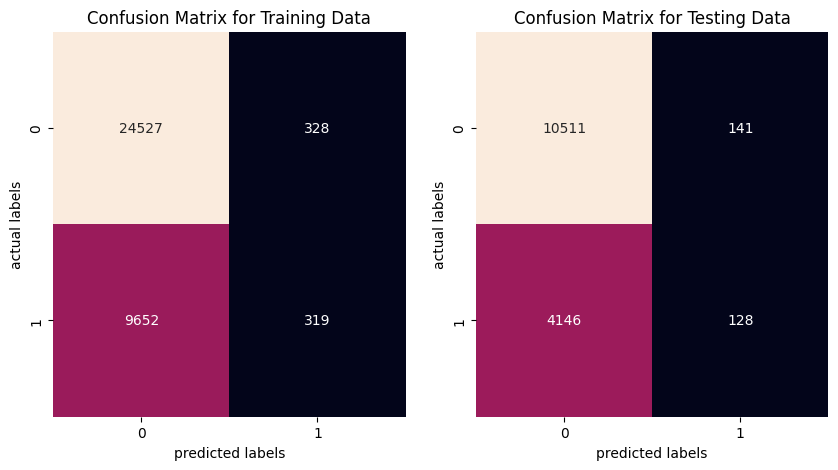

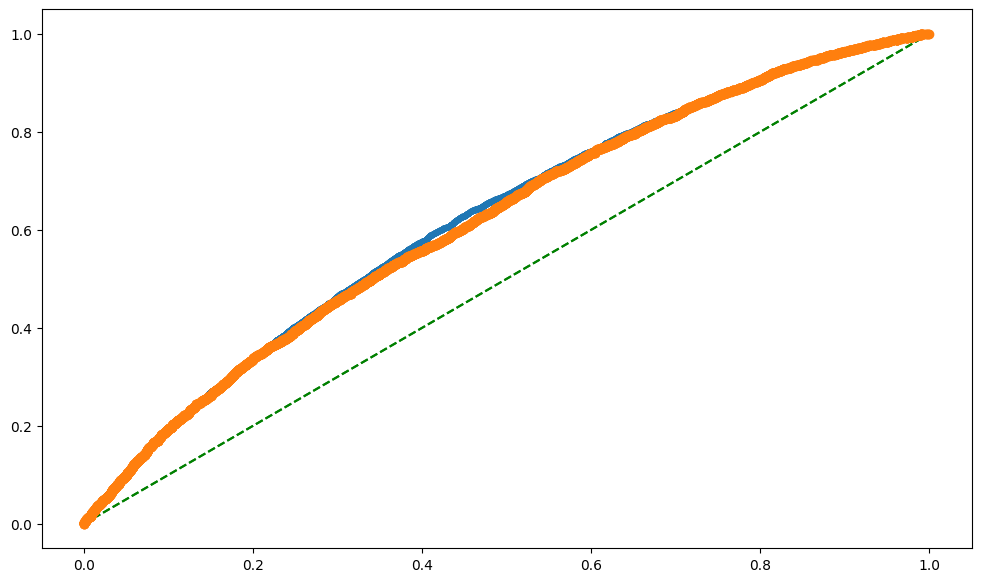



######################################################################################################################################################################################################


BASE LOGISTIC REGRESSION MODEL
classification report for training data
              precision    recall  f1-score   support

           0       0.72      0.99      0.83     24855
           1       0.50      0.03      0.06      9971

    accuracy                           0.71     34826
   macro avg       0.61      0.51      0.45     34826
weighted avg       0.66      0.71      0.61     34826



classification report for testing data
              precision    recall  f1-score   support

           0       0.72      0.99      0.83     10652
           1       0.49      0.03      0.06      4274

    accuracy                           0.71     14926
   macro avg       0.60      0.51      0.45     14926
weighted avg       0.65      0.71      0.61     14926



the model score for training 

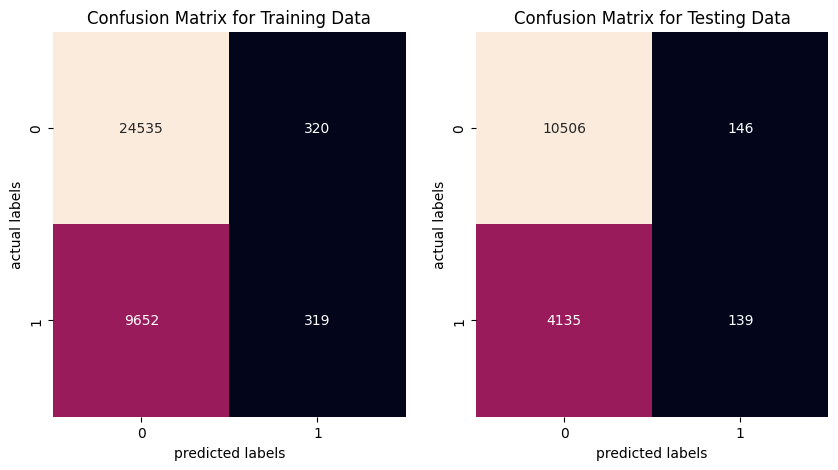

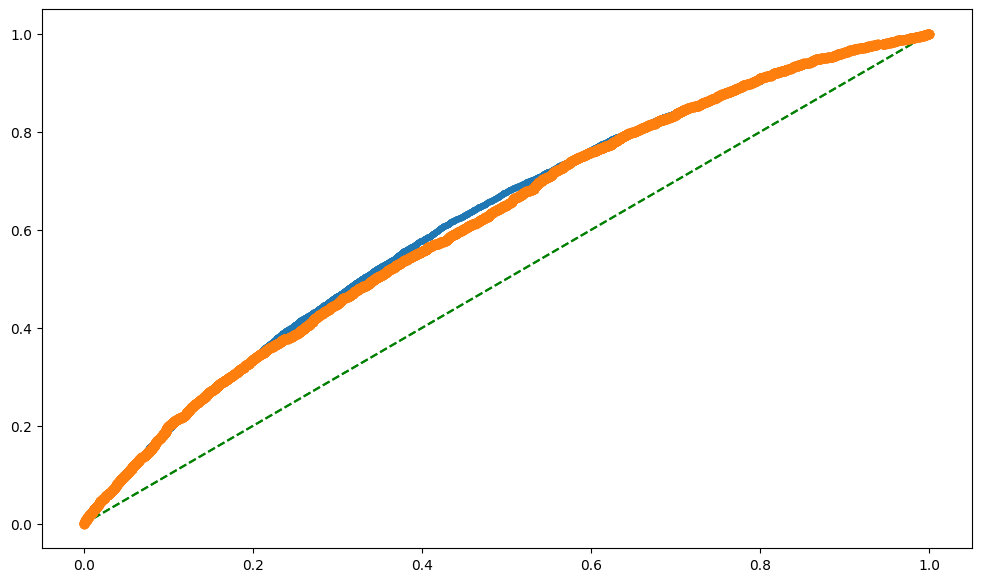



######################################################################################################################################################################################################


BASE ADA BOOST MODEL
classification report for training data
              precision    recall  f1-score   support

           0       0.73      0.97      0.83     24855
           1       0.55      0.10      0.17      9971

    accuracy                           0.72     34826
   macro avg       0.64      0.53      0.50     34826
weighted avg       0.68      0.72      0.64     34826



classification report for testing data
              precision    recall  f1-score   support

           0       0.73      0.97      0.83     10652
           1       0.55      0.10      0.17      4274

    accuracy                           0.72     14926
   macro avg       0.64      0.53      0.50     14926
weighted avg       0.68      0.72      0.64     14926



the model score for training data is  0

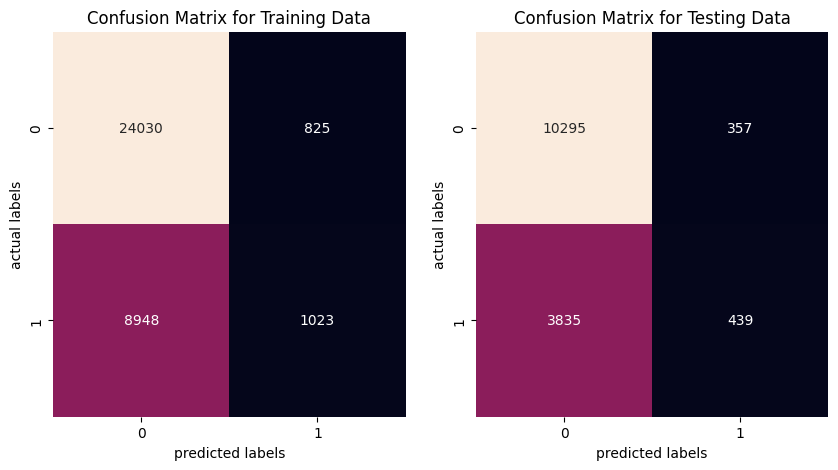

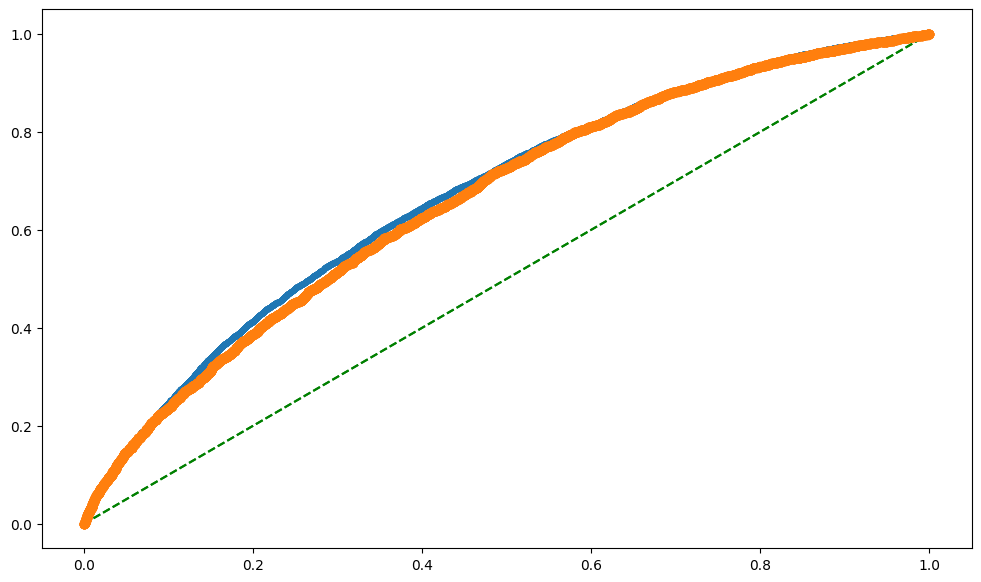



######################################################################################################################################################################################################


BASE DECISION TREE MODEL
classification report for training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24855
           1       1.00      1.00      1.00      9971

    accuracy                           1.00     34826
   macro avg       1.00      1.00      1.00     34826
weighted avg       1.00      1.00      1.00     34826



classification report for testing data
              precision    recall  f1-score   support

           0       0.74      0.72      0.73     10652
           1       0.35      0.37      0.36      4274

    accuracy                           0.62     14926
   macro avg       0.54      0.55      0.55     14926
weighted avg       0.63      0.62      0.63     14926



the model score for training data i

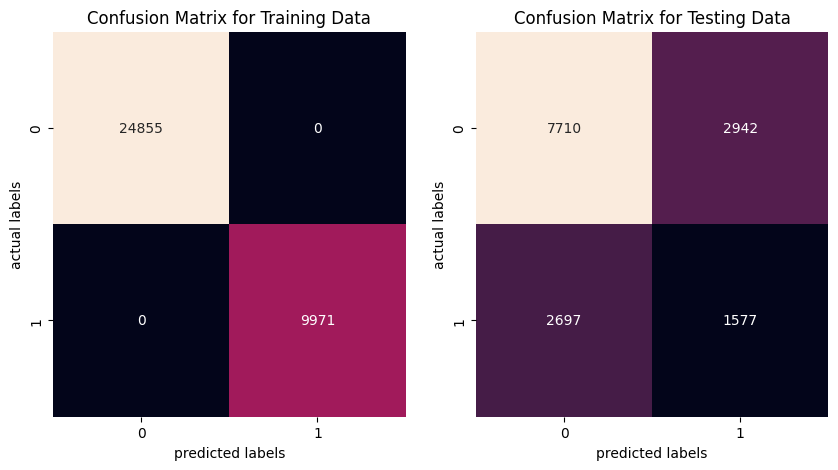

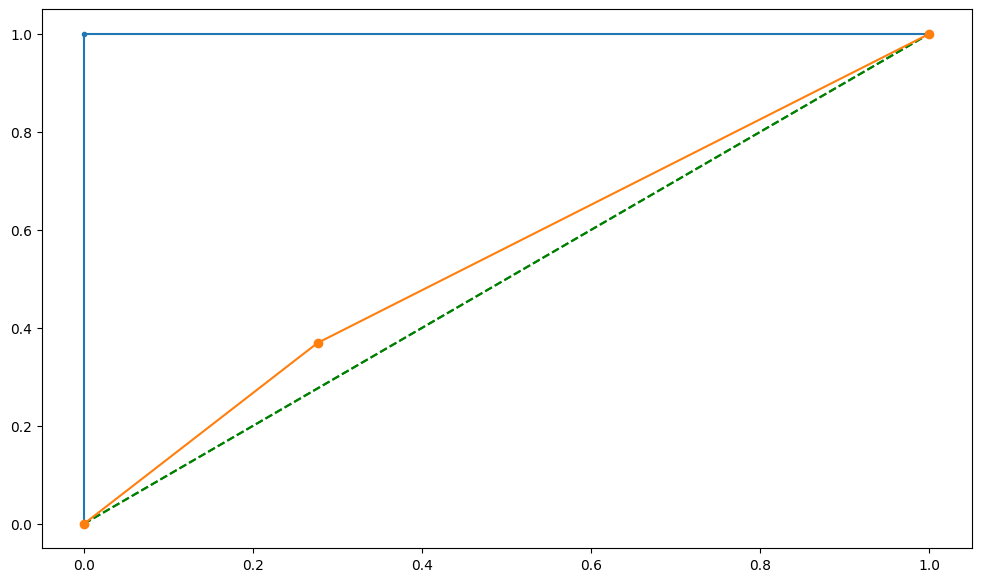



######################################################################################################################################################################################################


BASE RANDOM FOREST MODEL
classification report for training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24855
           1       1.00      1.00      1.00      9971

    accuracy                           1.00     34826
   macro avg       1.00      1.00      1.00     34826
weighted avg       1.00      1.00      1.00     34826



classification report for testing data
              precision    recall  f1-score   support

           0       0.72      0.98      0.83     10652
           1       0.57      0.07      0.12      4274

    accuracy                           0.72     14926
   macro avg       0.65      0.52      0.48     14926
weighted avg       0.68      0.72      0.63     14926



the model score for training data i

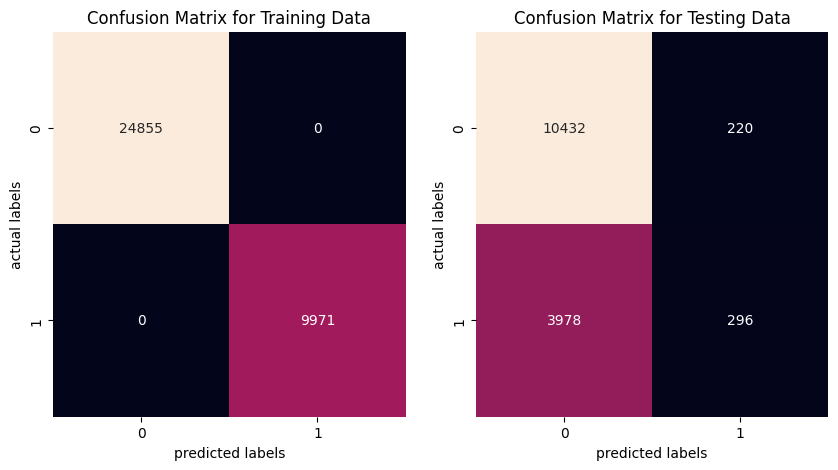

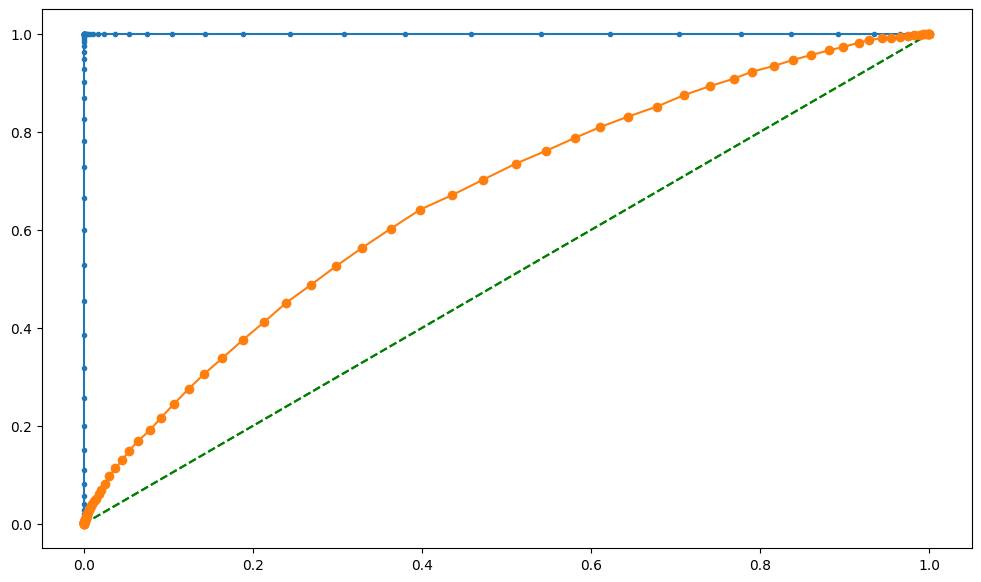



######################################################################################################################################################################################################


BASE KNN MODEL
classification report for training data
              precision    recall  f1-score   support

           0       0.79      0.93      0.85     24855
           1       0.67      0.37      0.48      9971

    accuracy                           0.77     34826
   macro avg       0.73      0.65      0.66     34826
weighted avg       0.75      0.77      0.74     34826



classification report for testing data
              precision    recall  f1-score   support

           0       0.73      0.87      0.79     10652
           1       0.37      0.19      0.26      4274

    accuracy                           0.67     14926
   macro avg       0.55      0.53      0.52     14926
weighted avg       0.63      0.67      0.64     14926



the model score for training data is  0.7662


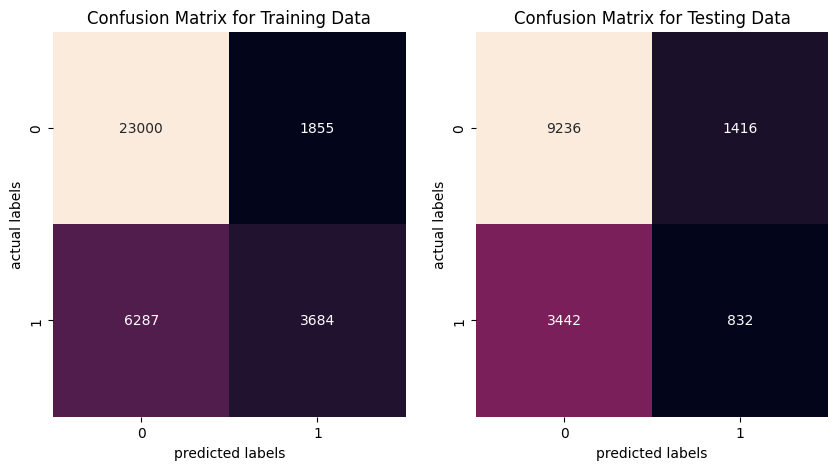

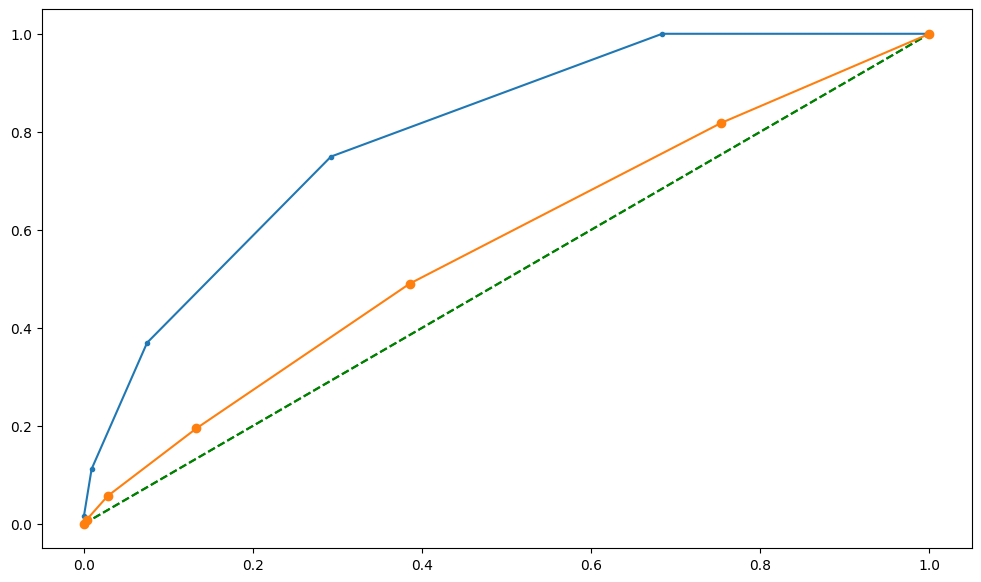



######################################################################################################################################################################################################


BASE XGB CLASSIFIER
classification report for training data
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     24855
           1       0.92      0.50      0.65      9971

    accuracy                           0.84     34826
   macro avg       0.87      0.74      0.77     34826
weighted avg       0.86      0.84      0.83     34826



classification report for testing data
              precision    recall  f1-score   support

           0       0.74      0.92      0.82     10652
           1       0.50      0.20      0.28      4274

    accuracy                           0.71     14926
   macro avg       0.62      0.56      0.55     14926
weighted avg       0.67      0.71      0.67     14926



the model score for training data is  0.

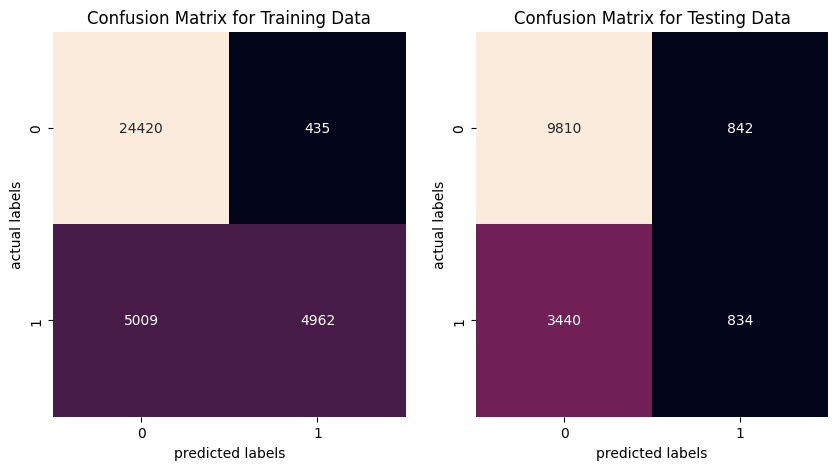

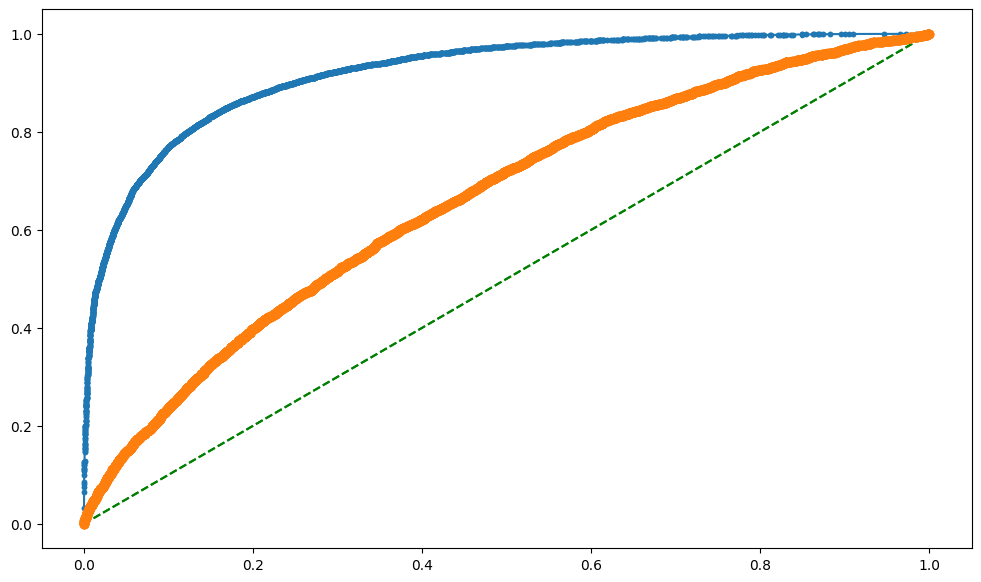



######################################################################################################################################################################################################


BASE MLP CLASSIFIER
classification report for training data
              precision    recall  f1-score   support

           0       0.78      0.67      0.72     24855
           1       0.39      0.53      0.45      9971

    accuracy                           0.63     34826
   macro avg       0.58      0.60      0.58     34826
weighted avg       0.67      0.63      0.64     34826



classification report for testing data
              precision    recall  f1-score   support

           0       0.76      0.65      0.70     10652
           1       0.36      0.49      0.42      4274

    accuracy                           0.61     14926
   macro avg       0.56      0.57      0.56     14926
weighted avg       0.65      0.61      0.62     14926



the model score for training data is  0.

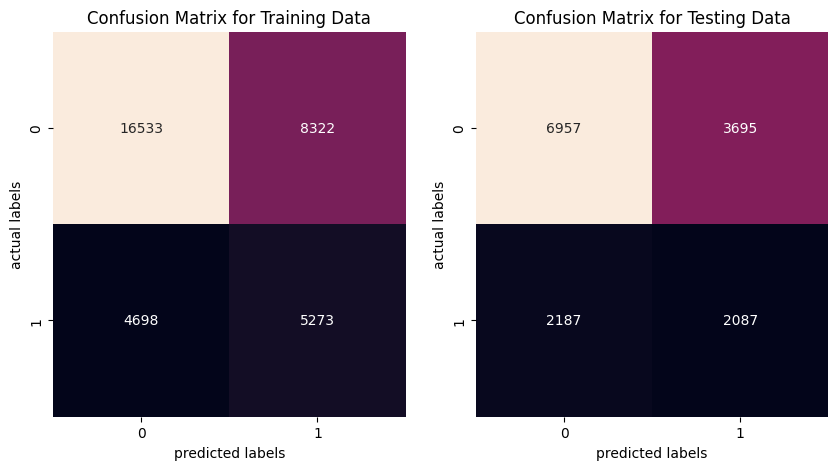

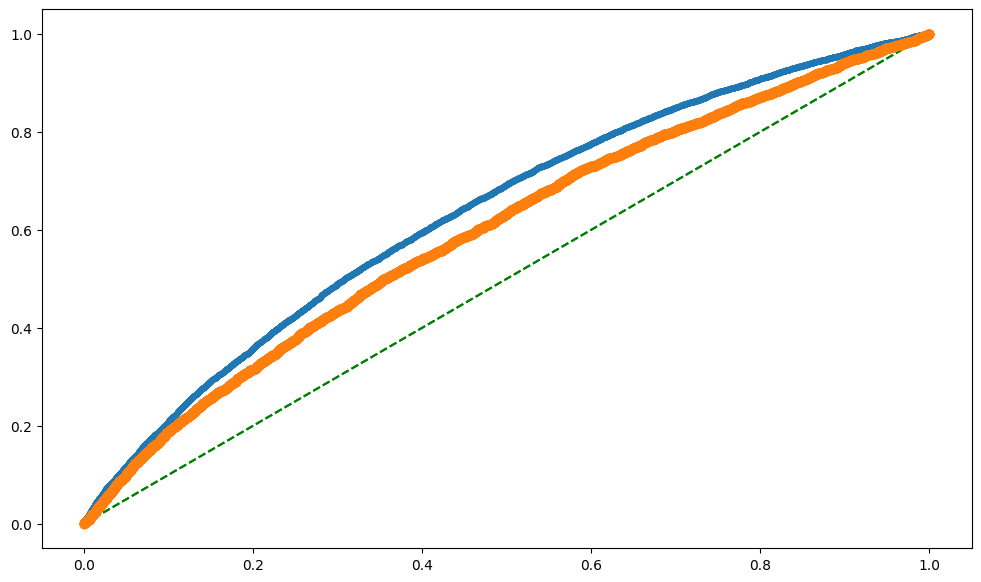



######################################################################################################################################################################################################


BASE QDA MODEL


/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


classification report for training data
              precision    recall  f1-score   support

           0       0.87      0.03      0.05     24855
           1       0.29      0.99      0.45      9971

    accuracy                           0.30     34826
   macro avg       0.58      0.51      0.25     34826
weighted avg       0.70      0.30      0.17     34826



classification report for testing data
              precision    recall  f1-score   support

           0       0.79      0.02      0.05     10652
           1       0.29      0.98      0.45      4274

    accuracy                           0.30     14926
   macro avg       0.54      0.50      0.25     14926
weighted avg       0.64      0.30      0.16     14926



the model score for training data is  0.303
the model score for testing data is  0.2993


AUC Score for Model on Training Data is 0.6058
AUC Score for Model on Testing Data is 0.576


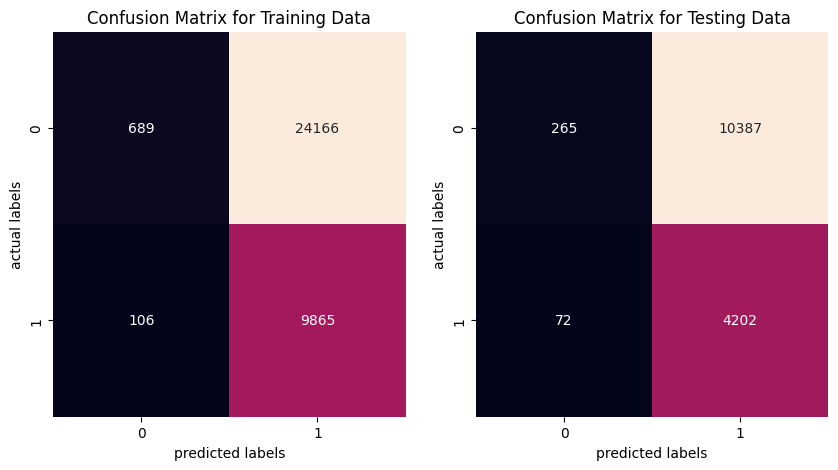

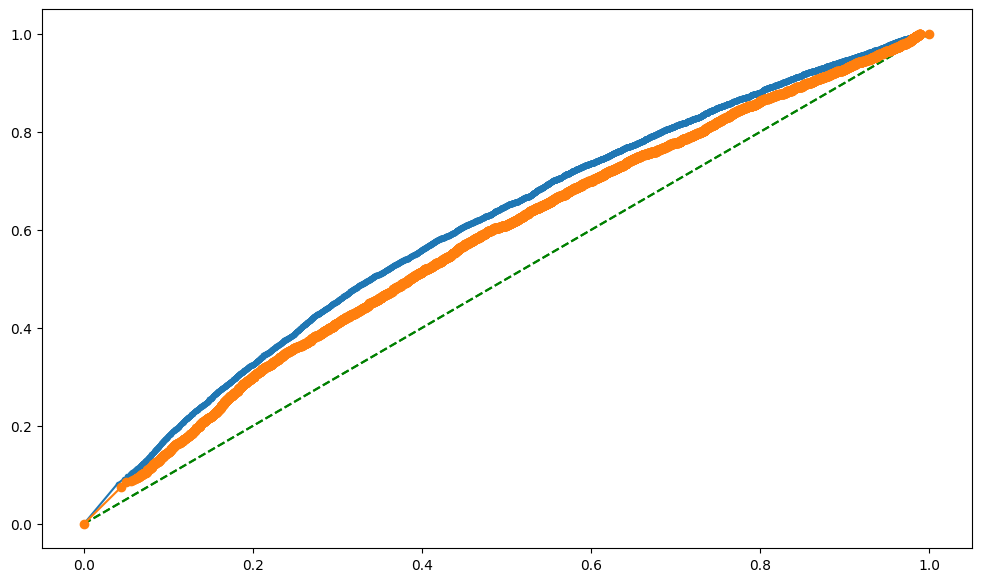



######################################################################################################################################################################################################




In [10]:
# function for training a model
def model_training(model, x_train, y_train):
    # Train the Model on training data
    trained_model = model.fit(x_train, y_train)
    return trained_model



for model_name,model in base_models.items():
    print(model_name.upper())
    
    # Model Training
    trained_model = model_training(model, x_train, y_train)
    
    # # train and test preds
    train_pred_mod = trained_model.predict(x_train)
    test_pred_mod = trained_model.predict(x_test)

    
    # # look at the model performance metrics
    model_performance(trained_model , x_train, y_train, train_pred_mod, x_test, y_test, test_pred_mod)


    # # ROC-AUC 
    roc_score_auc_curve(trained_model, x_train, y_train, train_pred_mod, x_test, y_test, test_pred_mod)

    # Display the plots
    plt.show()

    
    print('\n')
    print('######################################################################################################################################################################################################')
    print('\n')

## 1. Tuning LDA Model

In [21]:
params = {
    'solver' : ['svd', 'lsqr', 'eigen'],
    # 'tol' : [0.001,0.0001,0.00001]
}

lda_model =  LinearDiscriminantAnalysis()
grid = GridSearchCV(estimator = lda_model, param_grid=params, cv=3, scoring='recall', verbose=3)

In [22]:
grid.fit(x_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END ........................solver=svd;, score=0.032 total time=   0.3s
[CV 2/3] END ........................solver=svd;, score=0.036 total time=   0.2s
[CV 3/3] END ........................solver=svd;, score=0.033 total time=   0.2s
[CV 1/3] END .......................solver=lsqr;, score=0.032 total time=   0.2s
[CV 2/3] END .......................solver=lsqr;, score=0.036 total time=   0.2s
[CV 3/3] END .......................solver=lsqr;, score=0.033 total time=   0.2s
[CV 1/3] END ......................solver=eigen;, score=0.032 total time=   0.2s
[CV 2/3] END ......................solver=eigen;, score=0.036 total time=   0.2s
[CV 3/3] END ......................solver=eigen;, score=0.033 total time=   0.2s


GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen']}, scoring='recall',
             verbose=3)

In [23]:
grid.best_params_

{'solver': 'svd'}

In [25]:
best_model = grid.best_estimator_

classification report for training data
              precision    recall  f1-score   support

           0       0.72      0.99      0.83     24855
           1       0.49      0.03      0.06      9971

    accuracy                           0.71     34826
   macro avg       0.61      0.51      0.45     34826
weighted avg       0.65      0.71      0.61     34826



classification report for testing data
              precision    recall  f1-score   support

           0       0.72      0.99      0.83     10652
           1       0.48      0.03      0.06      4274

    accuracy                           0.71     14926
   macro avg       0.60      0.51      0.44     14926
weighted avg       0.65      0.71      0.61     14926



the model score for training data is  0.7134
the model score for testing data is  0.7128




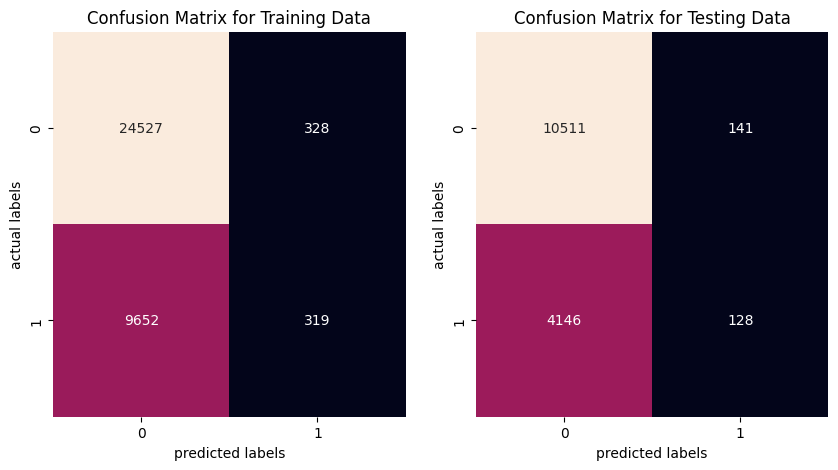

In [28]:
model_performance(best_model , x_train, y_train, x_test, y_test)

AUC Score for Model on Training Data is 0.623
AUC Score for Model on Testing Data is 0.6171


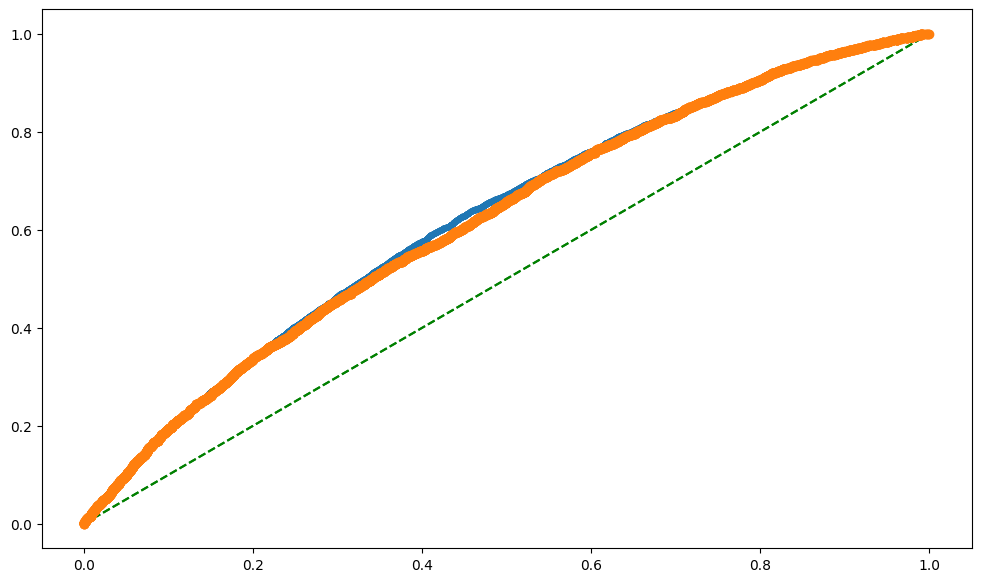

In [31]:
roc_score_auc_curve(best_model, x_train, y_train, x_test, y_test)

## 2. Logistic Regression

In [36]:
params = {
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'tol' : [0.01,0.001,0.0001],
    #'penalty': ['l1', 'l2'],
    # 'max_iter': [1000, 10000],
    'C' : np.logspace(-4,4,10,20),
}
logit_model =  LogisticRegression(max_iter = 100000,random_state=1, class_weight='balanced')
grid = GridSearchCV(estimator = logit_model, param_grid=params, cv=3, scoring='recall', verbose=3)

In [37]:
grid.fit(x_train, y_train)

Fitting 3 folds for each of 150 candidates, totalling 450 fits
[CV 1/3] END C=0.0001, solver=newton-cg, tol=0.01;, score=0.599 total time=   1.1s
[CV 2/3] END C=0.0001, solver=newton-cg, tol=0.01;, score=0.585 total time=   0.9s
[CV 3/3] END C=0.0001, solver=newton-cg, tol=0.01;, score=0.596 total time=   1.0s
[CV 1/3] END C=0.0001, solver=newton-cg, tol=0.001;, score=0.599 total time=   1.0s
[CV 2/3] END C=0.0001, solver=newton-cg, tol=0.001;, score=0.585 total time=   1.0s
[CV 3/3] END C=0.0001, solver=newton-cg, tol=0.001;, score=0.596 total time=   1.1s
[CV 1/3] END C=0.0001, solver=newton-cg, tol=0.0001;, score=0.599 total time=   1.0s
[CV 2/3] END C=0.0001, solver=newton-cg, tol=0.0001;, score=0.585 total time=   1.0s
[CV 3/3] END C=0.0001, solver=newton-cg, tol=0.0001;, score=0.596 total time=   1.2s
[CV 1/3] END ..C=0.0001, solver=lbfgs, tol=0.01;, score=0.598 total time=   2.0s
[CV 2/3] END ..C=0.0001, solver=lbfgs, tol=0.01;, score=0.583 total time=   1.9s
[CV 3/3] END ..C=0.

/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 1/3] END C=2.782559402207126, solver=newton-cg, tol=0.0001;, score=0.571 total time=  12.3s


/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/3] END C=2.782559402207126, solver=newton-cg, tol=0.0001;, score=0.577 total time=  16.6s


/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/3] END C=2.782559402207126, solver=newton-cg, tol=0.0001;, score=0.592 total time=  12.2s
[CV 1/3] END C=2.782559402207126, solver=lbfgs, tol=0.01;, score=0.564 total time=  18.6s
[CV 2/3] END C=2.782559402207126, solver=lbfgs, tol=0.01;, score=0.573 total time=  34.3s
[CV 3/3] END C=2.782559402207126, solver=lbfgs, tol=0.01;, score=0.586 total time=  29.5s
[CV 1/3] END C=2.782559402207126, solver=lbfgs, tol=0.001;, score=0.564 total time=  18.0s
[CV 2/3] END C=2.782559402207126, solver=lbfgs, tol=0.001;, score=0.573 total time=  32.0s
[CV 3/3] END C=2.782559402207126, solver=lbfgs, tol=0.001;, score=0.586 total time=  29.8s
[CV 1/3] END C=2.782559402207126, solver=lbfgs, tol=0.0001;, score=0.564 total time=  18.4s
[CV 2/3] END C=2.782559402207126, solver=lbfgs, tol=0.0001;, score=0.573 total time=  33.9s
[CV 3/3] END C=2.782559402207126, solver=lbfgs, tol=0.0001;, score=0.586 total time=  29.5s
[CV 1/3] END C=2.782559402207126, solver=liblinear, tol=0.01;, score=0.579 total time

/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/3] END C=21.54434690031882, solver=newton-cg, tol=0.001;, score=0.593 total time=  33.2s


/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 1/3] END C=21.54434690031882, solver=newton-cg, tol=0.0001;, score=0.573 total time=  42.7s


/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/3] END C=21.54434690031882, solver=newton-cg, tol=0.0001;, score=0.578 total time=  55.4s


/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/3] END C=21.54434690031882, solver=newton-cg, tol=0.0001;, score=0.593 total time=  31.8s
[CV 1/3] END C=21.54434690031882, solver=lbfgs, tol=0.01;, score=0.566 total time=  22.7s
[CV 2/3] END C=21.54434690031882, solver=lbfgs, tol=0.01;, score=0.573 total time=  15.9s
[CV 3/3] END C=21.54434690031882, solver=lbfgs, tol=0.01;, score=0.586 total time=  25.6s
[CV 1/3] END C=21.54434690031882, solver=lbfgs, tol=0.001;, score=0.566 total time=  24.9s
[CV 2/3] END C=21.54434690031882, solver=lbfgs, tol=0.001;, score=0.573 total time=  15.8s
[CV 3/3] END C=21.54434690031882, solver=lbfgs, tol=0.001;, score=0.586 total time=  25.3s
[CV 1/3] END C=21.54434690031882, solver=lbfgs, tol=0.0001;, score=0.566 total time=  24.2s
[CV 2/3] END C=21.54434690031882, solver=lbfgs, tol=0.0001;, score=0.573 total time=  15.2s
[CV 3/3] END C=21.54434690031882, solver=lbfgs, tol=0.0001;, score=0.586 total time=  24.8s
[CV 1/3] END C=21.54434690031882, solver=liblinear, tol=0.01;, score=0.601 total time

/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/3] END C=166.81005372000558, solver=newton-cg, tol=0.001;, score=0.579 total time= 1.9min
[CV 3/3] END C=166.81005372000558, solver=newton-cg, tol=0.001;, score=0.594 total time= 1.8min


/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 1/3] END C=166.81005372000558, solver=newton-cg, tol=0.0001;, score=0.574 total time= 1.9min


/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/3] END C=166.81005372000558, solver=newton-cg, tol=0.0001;, score=0.579 total time= 1.9min


/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/3] END C=166.81005372000558, solver=newton-cg, tol=0.0001;, score=0.594 total time= 2.3min
[CV 1/3] END C=166.81005372000558, solver=lbfgs, tol=0.01;, score=0.568 total time=  33.7s
[CV 2/3] END C=166.81005372000558, solver=lbfgs, tol=0.01;, score=0.572 total time=  22.0s
[CV 3/3] END C=166.81005372000558, solver=lbfgs, tol=0.01;, score=0.588 total time=  28.3s
[CV 1/3] END C=166.81005372000558, solver=lbfgs, tol=0.001;, score=0.568 total time=  29.4s
[CV 2/3] END C=166.81005372000558, solver=lbfgs, tol=0.001;, score=0.572 total time=  21.9s
[CV 3/3] END C=166.81005372000558, solver=lbfgs, tol=0.001;, score=0.588 total time=  29.2s
[CV 1/3] END C=166.81005372000558, solver=lbfgs, tol=0.0001;, score=0.568 total time=  30.7s
[CV 2/3] END C=166.81005372000558, solver=lbfgs, tol=0.0001;, score=0.572 total time=  22.8s
[CV 3/3] END C=166.81005372000558, solver=lbfgs, tol=0.0001;, score=0.588 total time=  28.5s
[CV 1/3] END C=166.81005372000558, solver=liblinear, tol=0.01;, score=0.578

/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 1/3] END C=1291.5496650148827, solver=newton-cg, tol=0.001;, score=0.574 total time= 3.3min
[CV 2/3] END C=1291.5496650148827, solver=newton-cg, tol=0.001;, score=0.579 total time= 5.4min


/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/3] END C=1291.5496650148827, solver=newton-cg, tol=0.001;, score=0.594 total time= 4.7min


/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 1/3] END C=1291.5496650148827, solver=newton-cg, tol=0.0001;, score=0.574 total time= 3.3min


/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/3] END C=1291.5496650148827, solver=newton-cg, tol=0.0001;, score=0.579 total time= 6.3min


/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/3] END C=1291.5496650148827, solver=newton-cg, tol=0.0001;, score=0.594 total time= 4.4min
[CV 1/3] END C=1291.5496650148827, solver=lbfgs, tol=0.01;, score=0.566 total time=  19.7s
[CV 2/3] END C=1291.5496650148827, solver=lbfgs, tol=0.01;, score=0.573 total time=  21.3s
[CV 3/3] END C=1291.5496650148827, solver=lbfgs, tol=0.01;, score=0.582 total time=  14.4s
[CV 1/3] END C=1291.5496650148827, solver=lbfgs, tol=0.001;, score=0.566 total time=  18.6s
[CV 2/3] END C=1291.5496650148827, solver=lbfgs, tol=0.001;, score=0.573 total time=  20.3s
[CV 3/3] END C=1291.5496650148827, solver=lbfgs, tol=0.001;, score=0.582 total time=  14.5s
[CV 1/3] END C=1291.5496650148827, solver=lbfgs, tol=0.0001;, score=0.566 total time=  18.5s
[CV 2/3] END C=1291.5496650148827, solver=lbfgs, tol=0.0001;, score=0.573 total time=  20.3s
[CV 3/3] END C=1291.5496650148827, solver=lbfgs, tol=0.0001;, score=0.582 total time=  14.5s
[CV 1/3] END C=1291.5496650148827, solver=liblinear, tol=0.01;, score=0.591

/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 1/3] END C=10000.0, solver=newton-cg, tol=0.001;, score=0.574 total time= 6.7min


/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/3] END C=10000.0, solver=newton-cg, tol=0.001;, score=0.579 total time= 7.7min


/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/3] END C=10000.0, solver=newton-cg, tol=0.001;, score=0.594 total time= 5.9min


/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 1/3] END C=10000.0, solver=newton-cg, tol=0.0001;, score=0.574 total time= 6.7min


/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/3] END C=10000.0, solver=newton-cg, tol=0.0001;, score=0.579 total time= 8.5min


/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/3] END C=10000.0, solver=newton-cg, tol=0.0001;, score=0.594 total time= 6.5min
[CV 1/3] END .C=10000.0, solver=lbfgs, tol=0.01;, score=0.564 total time=  19.3s
[CV 2/3] END .C=10000.0, solver=lbfgs, tol=0.01;, score=0.573 total time=  25.3s
[CV 3/3] END .C=10000.0, solver=lbfgs, tol=0.01;, score=0.584 total time=  21.7s
[CV 1/3] END C=10000.0, solver=lbfgs, tol=0.001;, score=0.564 total time=  19.4s
[CV 2/3] END C=10000.0, solver=lbfgs, tol=0.001;, score=0.573 total time=  25.5s
[CV 3/3] END C=10000.0, solver=lbfgs, tol=0.001;, score=0.584 total time=  21.4s
[CV 1/3] END C=10000.0, solver=lbfgs, tol=0.0001;, score=0.564 total time=  19.5s
[CV 2/3] END C=10000.0, solver=lbfgs, tol=0.0001;, score=0.573 total time=  25.7s
[CV 3/3] END C=10000.0, solver=lbfgs, tol=0.0001;, score=0.584 total time=  21.7s
[CV 1/3] END C=10000.0, solver=liblinear, tol=0.01;, score=0.603 total time=   0.9s
[CV 2/3] END C=10000.0, solver=liblinear, tol=0.01;, score=0.591 total time=   1.8s
[CV 3/3] END C

GridSearchCV(cv=3,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=100000, random_state=1),
             param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.01, 0.001, 0.0001]},
             scoring='recall', verbose=3)

In [38]:
grid.best_params_

{'C': 0.3593813663804626, 'solver': 'liblinear', 'tol': 0.01}

In [39]:
best_model = grid.best_estimator_

classification report for training data
              precision    recall  f1-score   support

           0       0.78      0.57      0.66     24855
           1       0.36      0.60      0.45      9971

    accuracy                           0.58     34826
   macro avg       0.57      0.58      0.55     34826
weighted avg       0.66      0.58      0.60     34826



classification report for testing data
              precision    recall  f1-score   support

           0       0.78      0.57      0.66     10652
           1       0.35      0.59      0.44      4274

    accuracy                           0.57     14926
   macro avg       0.56      0.58      0.55     14926
weighted avg       0.65      0.57      0.59     14926



the model score for training data is  0.5757
the model score for testing data is  0.5745




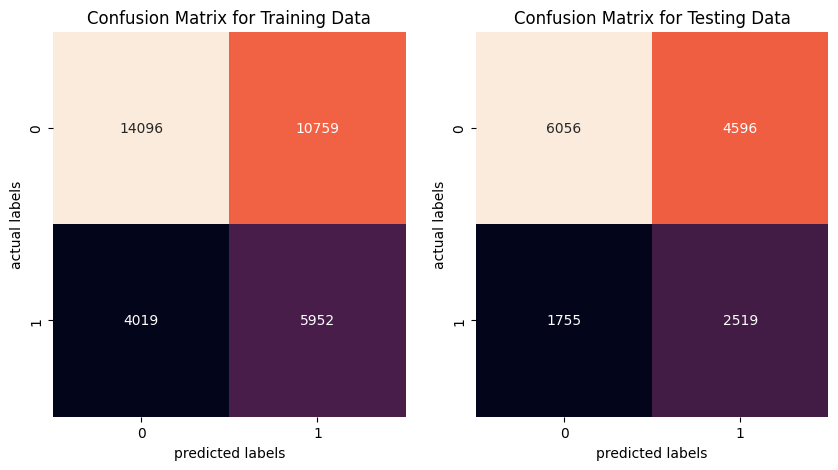

In [40]:
model_performance(best_model , x_train, y_train, x_test, y_test)

AUC Score for Model on Training Data is 0.6139
AUC Score for Model on Testing Data is 0.613


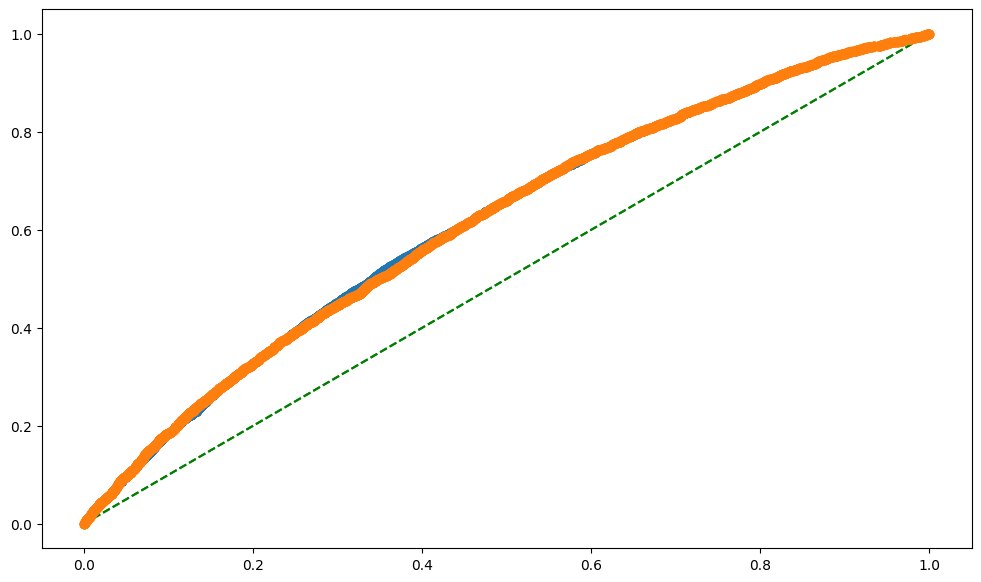

In [41]:
roc_score_auc_curve(best_model, x_train, y_train, x_test, y_test)

## 3. ADA Boost Model

In [42]:
params = {
    'n_estimators' : [500,600,700,800,900,1000,1100,1200,1300],
    'algorithm' : ['SAMME', 'SAMME.R'],
    'learning_rate' : [0.01,0.05,0.1,0.2,0.3,0.5]
   }
ada =  AdaBoostClassifier(random_state = 1)
grid = GridSearchCV(estimator = ada, param_grid=params, cv=3, scoring='recall', verbose=3)

In [43]:
grid.fit(x_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV 1/3] END algorithm=SAMME, learning_rate=0.01, n_estimators=500;, score=0.000 total time=  17.2s
[CV 2/3] END algorithm=SAMME, learning_rate=0.01, n_estimators=500;, score=0.000 total time=  17.0s
[CV 3/3] END algorithm=SAMME, learning_rate=0.01, n_estimators=500;, score=0.000 total time=  16.8s
[CV 1/3] END algorithm=SAMME, learning_rate=0.01, n_estimators=600;, score=0.000 total time=  20.1s
[CV 2/3] END algorithm=SAMME, learning_rate=0.01, n_estimators=600;, score=0.000 total time=  20.1s
[CV 3/3] END algorithm=SAMME, learning_rate=0.01, n_estimators=600;, score=0.000 total time=  20.1s
[CV 1/3] END algorithm=SAMME, learning_rate=0.01, n_estimators=700;, score=0.000 total time=  23.6s
[CV 2/3] END algorithm=SAMME, learning_rate=0.01, n_estimators=700;, score=0.000 total time=  23.5s
[CV 3/3] END algorithm=SAMME, learning_rate=0.01, n_estimators=700;, score=0.000 total time=  23.6s
[CV 1/3] END algorithm=SAMME, learnin

GridSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=1),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
                         'n_estimators': [500, 600, 700, 800, 900, 1000, 1100,
                                          1200, 1300]},
             scoring='recall', verbose=3)

In [44]:
grid.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 1300}

In [45]:
best_model = grid.best_estimator_

classification report for training data
              precision    recall  f1-score   support

           0       0.74      0.97      0.84     24855
           1       0.61      0.14      0.22      9971

    accuracy                           0.73     34826
   macro avg       0.67      0.55      0.53     34826
weighted avg       0.70      0.73      0.66     34826



classification report for testing data
              precision    recall  f1-score   support

           0       0.73      0.96      0.83     10652
           1       0.56      0.12      0.20      4274

    accuracy                           0.72     14926
   macro avg       0.65      0.54      0.52     14926
weighted avg       0.68      0.72      0.65     14926



the model score for training data is  0.7279
the model score for testing data is  0.7215




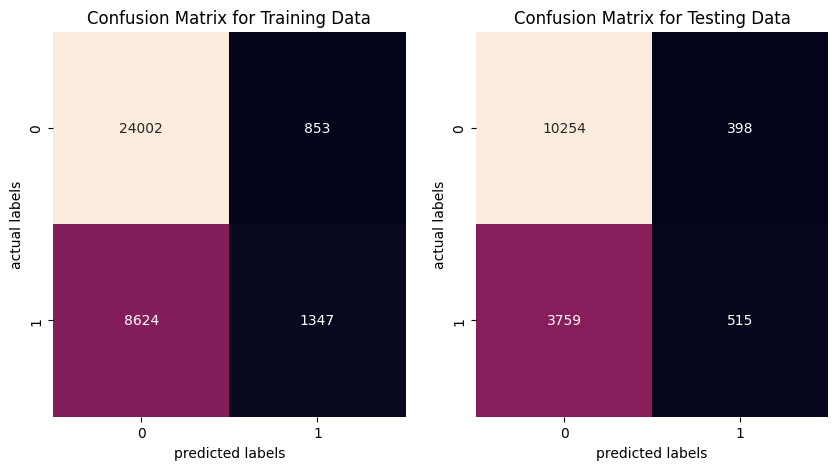

In [46]:
model_performance(best_model , x_train, y_train, x_test, y_test)

AUC Score for Model on Training Data is 0.7042
AUC Score for Model on Testing Data is 0.6673


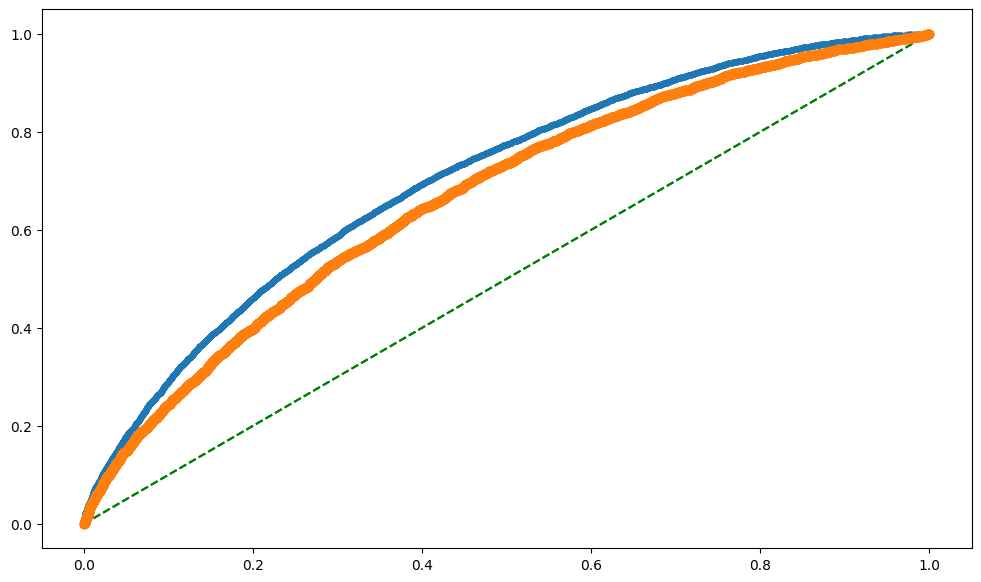

In [47]:
roc_score_auc_curve(best_model, x_train, y_train, x_test, y_test)

## 4. Decision Tree Model

In [48]:
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [6,7,8,9,10,11,12,13,14],
    #'min_samples_leaf' : [15,20,25,30,35,40,45,50,55,60,65,70],
    #'min_samples_split' : [25,30,35,40,45,50,60,70,80,90,100],
    }

dt_model = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator=dt_model, param_grid=params, cv=3, scoring='recall', verbose=3)

In [49]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END .......criterion=gini, max_depth=6;, score=0.107 total time=   0.2s
[CV 2/3] END .......criterion=gini, max_depth=6;, score=0.047 total time=   0.2s
[CV 3/3] END .......criterion=gini, max_depth=6;, score=0.058 total time=   0.2s
[CV 1/3] END .......criterion=gini, max_depth=7;, score=0.065 total time=   0.2s
[CV 2/3] END .......criterion=gini, max_depth=7;, score=0.080 total time=   0.2s
[CV 3/3] END .......criterion=gini, max_depth=7;, score=0.107 total time=   0.2s
[CV 1/3] END .......criterion=gini, max_depth=8;, score=0.131 total time=   0.2s
[CV 2/3] END .......criterion=gini, max_depth=8;, score=0.077 total time=   0.2s
[CV 3/3] END .......criterion=gini, max_depth=8;, score=0.112 total time=   0.2s
[CV 1/3] END .......criterion=gini, max_depth=9;, score=0.140 total time=   0.3s
[CV 2/3] END .......criterion=gini, max_depth=9;, score=0.110 total time=   0.3s
[CV 3/3] END .......criterion=gini, max_depth=9;

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8, 9, 10, 11, 12, 13, 14]},
             scoring='recall', verbose=3)

In [50]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 14}

In [51]:
best_model = grid_search.best_estimator_

classification report for training data
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     24855
           1       0.85      0.48      0.62      9971

    accuracy                           0.83     34826
   macro avg       0.84      0.72      0.75     34826
weighted avg       0.83      0.83      0.81     34826



classification report for testing data
              precision    recall  f1-score   support

           0       0.74      0.86      0.79     10652
           1       0.40      0.23      0.29      4274

    accuracy                           0.68     14926
   macro avg       0.57      0.54      0.54     14926
weighted avg       0.64      0.68      0.65     14926



the model score for training data is  0.8276
the model score for testing data is  0.6801




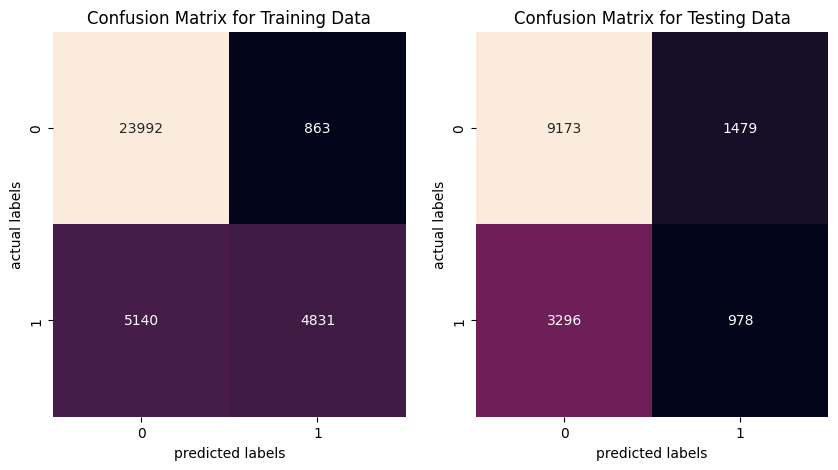

In [52]:
model_performance(best_model , x_train, y_train, x_test, y_test)

AUC Score for Model on Training Data is 0.8602
AUC Score for Model on Testing Data is 0.577


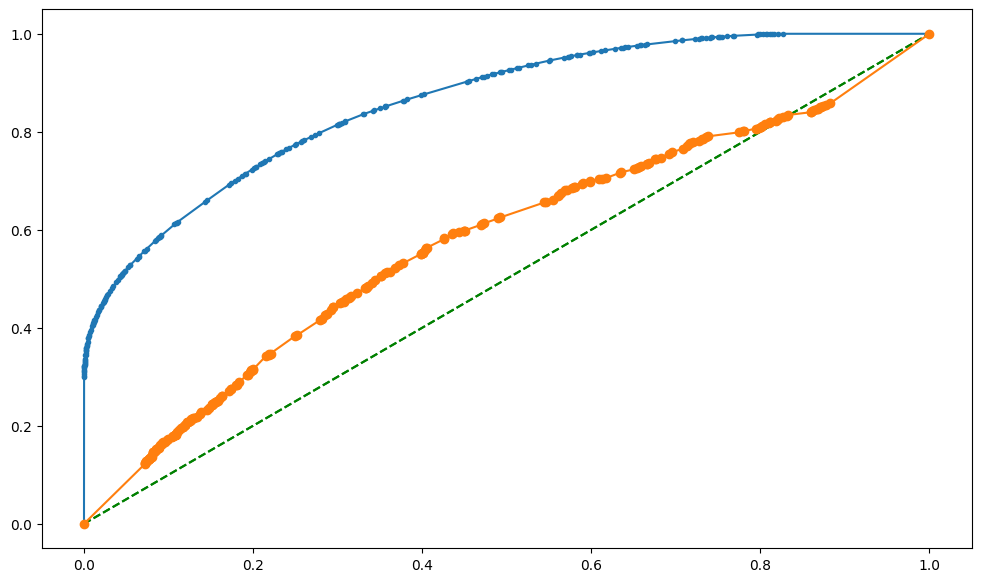

In [53]:
roc_score_auc_curve(best_model, x_train, y_train, x_test, y_test)

## 5. Random Forest Model

In [54]:
params = {
    'max_depth' : [7,8,9,10,11,12,13,14],
    'max_features': [15,16,17,18],
    #'min_samples_leaf': [15,20,25,30],
    #'min_samples_split': [60,65,70],
    'n_estimators' : [401,501,601,701,801],
}

rfcl = RandomForestClassifier()
grid = GridSearchCV(estimator=rfcl, param_grid=params, cv=3, scoring='recall', verbose=3)

In [55]:
grid.fit(x_train, y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits
[CV 1/3] END max_depth=7, max_features=15, n_estimators=401;, score=0.012 total time=  12.1s
[CV 2/3] END max_depth=7, max_features=15, n_estimators=401;, score=0.023 total time=  12.0s
[CV 3/3] END max_depth=7, max_features=15, n_estimators=401;, score=0.023 total time=  12.2s
[CV 1/3] END max_depth=7, max_features=15, n_estimators=501;, score=0.014 total time=  15.2s
[CV 2/3] END max_depth=7, max_features=15, n_estimators=501;, score=0.022 total time=  15.1s
[CV 3/3] END max_depth=7, max_features=15, n_estimators=501;, score=0.022 total time=  15.2s
[CV 1/3] END max_depth=7, max_features=15, n_estimators=601;, score=0.013 total time=  18.2s
[CV 2/3] END max_depth=7, max_features=15, n_estimators=601;, score=0.023 total time=  18.0s
[CV 3/3] END max_depth=7, max_features=15, n_estimators=601;, score=0.023 total time=  18.2s
[CV 1/3] END max_depth=7, max_features=15, n_estimators=701;, score=0.014 total time=  21.2s
[CV 2/3

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 8, 9, 10, 11, 12, 13, 14],
                         'max_features': [15, 16, 17, 18],
                         'n_estimators': [401, 501, 601, 701, 801]},
             scoring='recall', verbose=3)

In [56]:
grid.best_params_

{'max_depth': 14, 'max_features': 18, 'n_estimators': 701}

In [57]:
best_model = grid.best_estimator_

classification report for training data
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     24855
           1       1.00      0.38      0.55      9971

    accuracy                           0.82     34826
   macro avg       0.90      0.69      0.72     34826
weighted avg       0.86      0.82      0.79     34826



classification report for testing data
              precision    recall  f1-score   support

           0       0.72      0.99      0.84     10652
           1       0.67      0.06      0.10      4274

    accuracy                           0.72     14926
   macro avg       0.70      0.52      0.47     14926
weighted avg       0.71      0.72      0.63     14926



the model score for training data is  0.8227
the model score for testing data is  0.7218




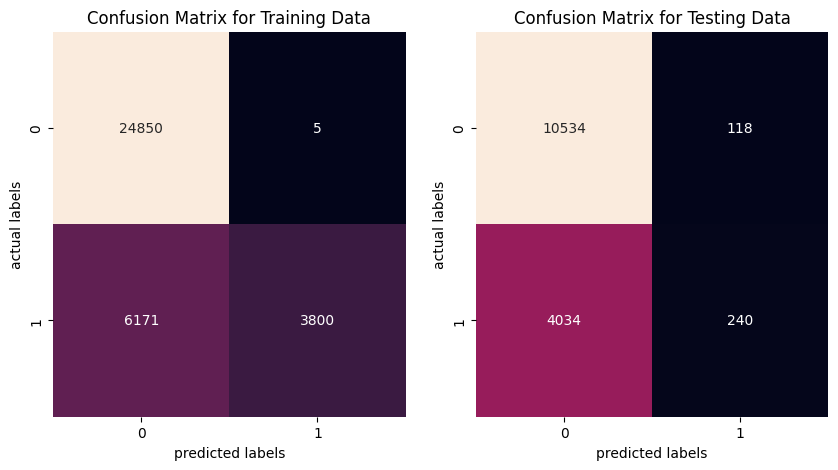

In [58]:
model_performance(best_model , x_train, y_train, x_test, y_test)

AUC Score for Model on Training Data is 0.9631
AUC Score for Model on Testing Data is 0.6782


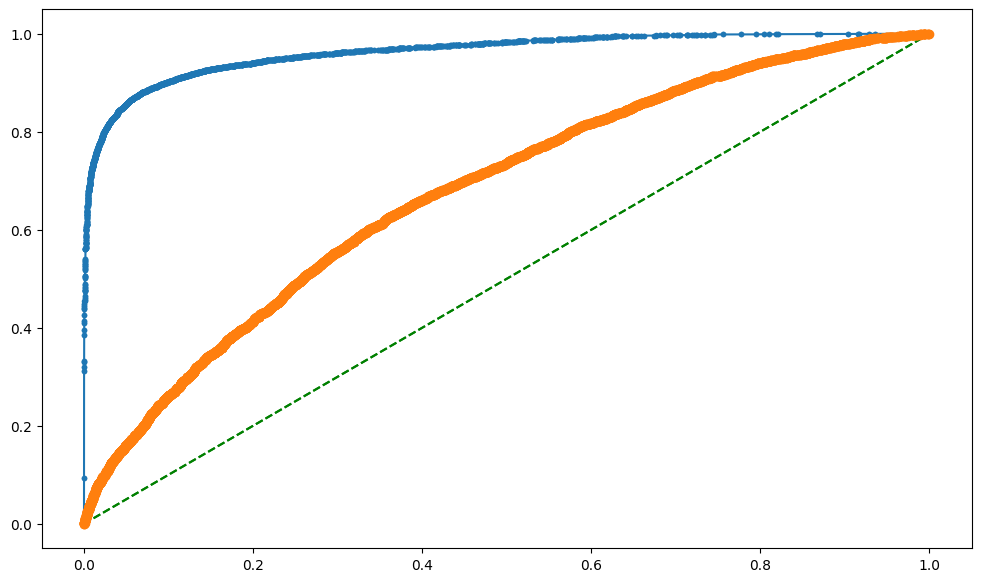

In [59]:
roc_score_auc_curve(best_model, x_train, y_train, x_test, y_test)

## 6. KNN Model

In [60]:
params = {
    'n_neighbors' : [2,3,5,7,],  #9,11
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : [15,20,25,30,35],
    'metric' :['minkowski','euclidean','manhattan','chebyshev']
    }
knn_model =  KNeighborsClassifier(n_jobs=-1)
grid = GridSearchCV(estimator = knn_model, param_grid=params, cv=3, scoring='recall', verbose=3)

In [61]:
grid.fit(x_train, y_train)

Fitting 3 folds for each of 640 candidates, totalling 1920 fits
[CV 1/3] END algorithm=auto, leaf_size=15, metric=minkowski, n_neighbors=2, weights=uniform;, score=0.111 total time=   0.6s
[CV 2/3] END algorithm=auto, leaf_size=15, metric=minkowski, n_neighbors=2, weights=uniform;, score=0.109 total time=   0.5s
[CV 3/3] END algorithm=auto, leaf_size=15, metric=minkowski, n_neighbors=2, weights=uniform;, score=0.105 total time=   0.5s
[CV 1/3] END algorithm=auto, leaf_size=15, metric=minkowski, n_neighbors=2, weights=distance;, score=0.322 total time=   0.3s
[CV 2/3] END algorithm=auto, leaf_size=15, metric=minkowski, n_neighbors=2, weights=distance;, score=0.318 total time=   0.3s
[CV 3/3] END algorithm=auto, leaf_size=15, metric=minkowski, n_neighbors=2, weights=distance;, score=0.305 total time=   0.3s
[CV 1/3] END algorithm=auto, leaf_size=15, metric=minkowski, n_neighbors=3, weights=uniform;, score=0.232 total time=   0.5s
[CV 2/3] END algorithm=auto, leaf_size=15, metric=minkowsk

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [15, 20, 25, 30, 35],
                         'metric': ['minkowski', 'euclidean', 'manhattan',
                                    'chebyshev'],
                         'n_neighbors': [2, 3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='recall', verbose=3)

In [62]:
grid.best_params_

{'algorithm': 'auto',
 'leaf_size': 15,
 'metric': 'minkowski',
 'n_neighbors': 2,
 'weights': 'distance'}

In [63]:
best_model = grid.best_estimator_

classification report for training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24855
           1       1.00      1.00      1.00      9971

    accuracy                           1.00     34826
   macro avg       1.00      1.00      1.00     34826
weighted avg       1.00      1.00      1.00     34826



classification report for testing data
              precision    recall  f1-score   support

           0       0.73      0.74      0.73     10652
           1       0.33      0.32      0.32      4274

    accuracy                           0.62     14926
   macro avg       0.53      0.53      0.53     14926
weighted avg       0.61      0.62      0.61     14926



the model score for training data is  1.0
the model score for testing data is  0.6165




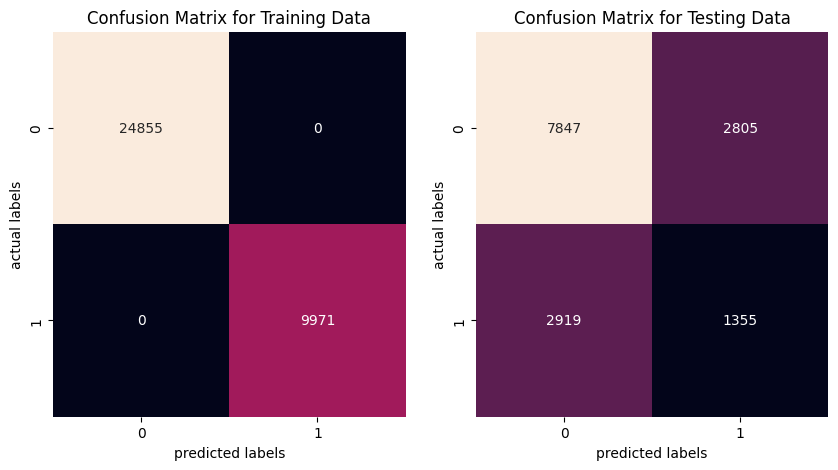

In [64]:
model_performance(best_model , x_train, y_train, x_test, y_test)

AUC Score for Model on Training Data is 1.0
AUC Score for Model on Testing Data is 0.5423


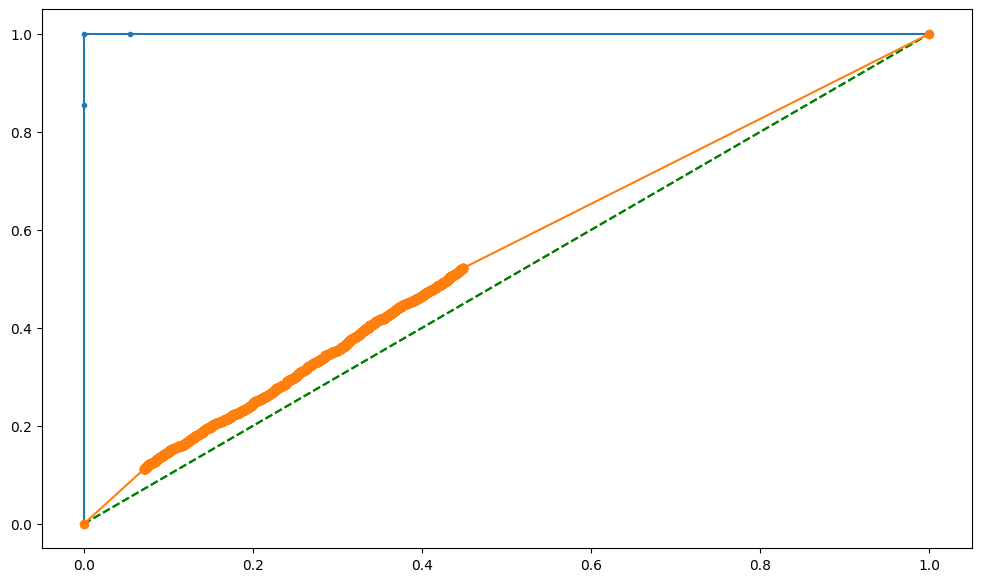

In [65]:
roc_score_auc_curve(best_model, x_train, y_train, x_test, y_test)

## 7. XGBoost Model

In [66]:
params = {
    'colsample_bytree': [0.5, 0.7], 
    'learning_rate': [0.1,0.5],      
    'max_depth': [7,8,9,10],         
    'n_estimators' : [800,900,1000,1100 ,1200],
    'subsample': [0.3,0.5, 0.7],
    
    }
   
xgb =  xgb.XGBClassifier(random_state = 1, use_label_encoder=False, booster='gbtree', eval_metric='logloss')
grid = GridSearchCV(estimator = xgb, param_grid=params, cv=3, scoring='recall', verbose=3)

In [67]:
grid.fit(x_train, y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, n_estimators=800, subsample=0.3;, score=0.236 total time=   1.9s
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, n_estimators=800, subsample=0.3;, score=0.235 total time=   1.9s
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, n_estimators=800, subsample=0.3;, score=0.238 total time=   1.9s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, n_estimators=800, subsample=0.5;, score=0.228 total time=   2.0s
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, n_estimators=800, subsample=0.5;, score=0.227 total time=   1.9s
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, n_estimators=800, subsample=0.5;, score=0.217 total time=   1.9s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, n_estimators=800, subsample=0.7;, score=0.205 total time=   1.9s
[CV 2/3] END 

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_r...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=1, ...),
             param_grid={'colsample_bytree': [0.5, 0.7],
                         'learning_rate': [0.1, 0.5],
                         'max_depth': [7, 8, 9, 10],
                         'n_estimators': [800, 900, 1000, 1100, 1200],
                         'subsample': [0.3, 0.5, 0.7]},
             scoring='recall', verbose=3)

In [68]:
grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.5,
 'max_depth': 8,
 'n_estimators': 800,
 'subsample': 0.3}

In [69]:
best_model = grid.best_estimator_

classification report for training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24855
           1       1.00      1.00      1.00      9971

    accuracy                           1.00     34826
   macro avg       1.00      1.00      1.00     34826
weighted avg       1.00      1.00      1.00     34826



classification report for testing data
              precision    recall  f1-score   support

           0       0.74      0.79      0.77     10652
           1       0.38      0.32      0.35      4274

    accuracy                           0.66     14926
   macro avg       0.56      0.56      0.56     14926
weighted avg       0.64      0.66      0.65     14926



the model score for training data is  1.0
the model score for testing data is  0.6576




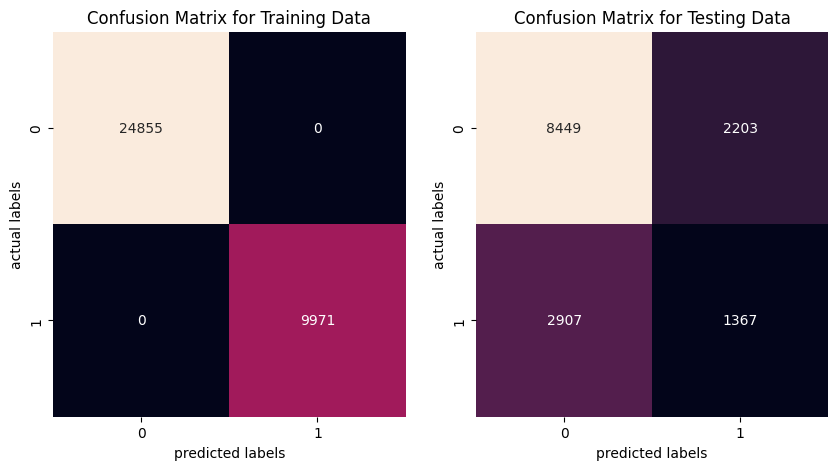

In [70]:
model_performance(best_model , x_train, y_train, x_test, y_test)

AUC Score for Model on Training Data is 1.0
AUC Score for Model on Testing Data is 0.5948


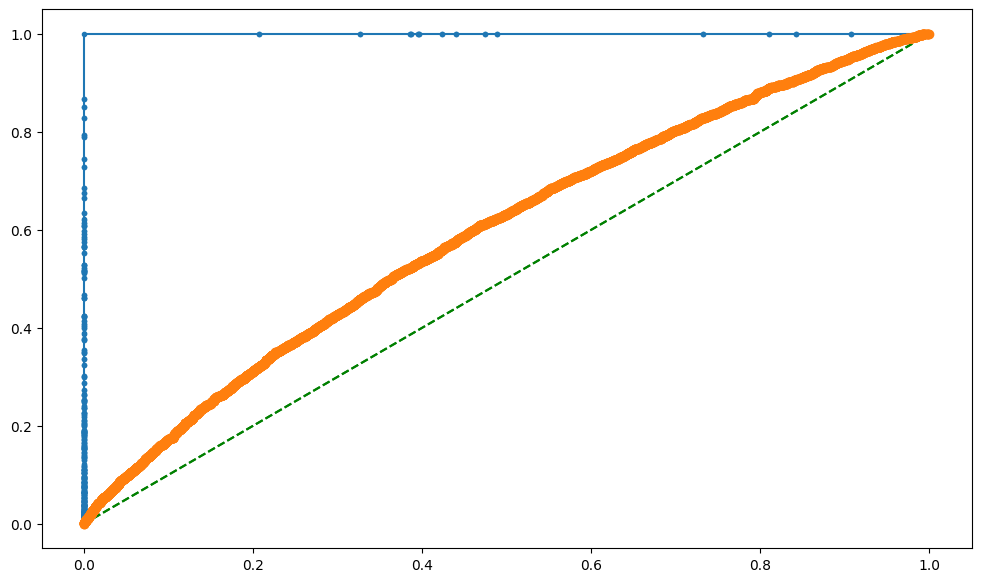

In [71]:
roc_score_auc_curve(best_model, x_train, y_train, x_test, y_test)

## 8. ANN Model

In [8]:
params = {
    'activation': ['logistic', 'relu', 'tanh', 'identity' ],
    'hidden_layer_sizes': [100, 200, 300, (100,100), (200,200), (300,300), (100, 100, 100)],
    'max_iter' : [10000],
    # 'solver': ['sgd', 'adam', 'lbfgs'],
    #'tol': [0.1,0.5,0.01],
    
}

ann = MLPClassifier(random_state=1)
grid = GridSearchCV(estimator=ann, param_grid=params,scoring='recall', cv=3, verbose=3)

In [9]:
grid.fit(x_train, y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV 1/3] END activation=logistic, hidden_layer_sizes=100, max_iter=10000;, score=0.138 total time=  16.7s
[CV 2/3] END activation=logistic, hidden_layer_sizes=100, max_iter=10000;, score=0.171 total time=  26.0s
[CV 3/3] END activation=logistic, hidden_layer_sizes=100, max_iter=10000;, score=0.208 total time=  34.0s
[CV 1/3] END activation=logistic, hidden_layer_sizes=200, max_iter=10000;, score=0.227 total time=  58.4s
[CV 2/3] END activation=logistic, hidden_layer_sizes=200, max_iter=10000;, score=0.208 total time=  45.9s
[CV 3/3] END activation=logistic, hidden_layer_sizes=200, max_iter=10000;, score=0.240 total time= 1.0min
[CV 1/3] END activation=logistic, hidden_layer_sizes=300, max_iter=10000;, score=0.259 total time= 1.8min
[CV 2/3] END activation=logistic, hidden_layer_sizes=300, max_iter=10000;, score=0.265 total time= 1.9min
[CV 3/3] END activation=logistic, hidden_layer_sizes=300, max_iter=10000;, score=0.246 tota

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=1),
             param_grid={'activation': ['logistic', 'relu', 'tanh', 'identity'],
                         'hidden_layer_sizes': [100, 200, 300, (100, 100),
                                                (200, 200), (300, 300),
                                                (100, 100, 100)],
                         'max_iter': [10000]},
             scoring='recall', verbose=3)

In [10]:
grid.best_params_

{'activation': 'relu', 'hidden_layer_sizes': 200, 'max_iter': 10000}

In [11]:
best_model = grid.best_estimator_

classification report for training data
              precision    recall  f1-score   support

           0       0.78      0.73      0.76     24855
           1       0.43      0.50      0.46      9971

    accuracy                           0.66     34826
   macro avg       0.60      0.61      0.61     34826
weighted avg       0.68      0.66      0.67     34826



classification report for testing data
              precision    recall  f1-score   support

           0       0.75      0.70      0.73     10652
           1       0.36      0.42      0.39      4274

    accuracy                           0.62     14926
   macro avg       0.56      0.56      0.56     14926
weighted avg       0.64      0.62      0.63     14926



the model score for training data is  0.6644
the model score for testing data is  0.6231




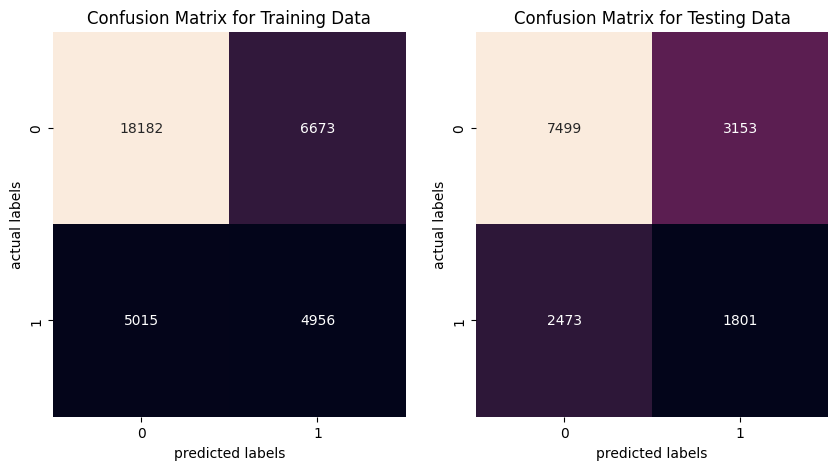

In [12]:
model_performance(best_model , x_train, y_train, x_test, y_test)

AUC Score for Model on Training Data is 0.6729
AUC Score for Model on Testing Data is 0.5876


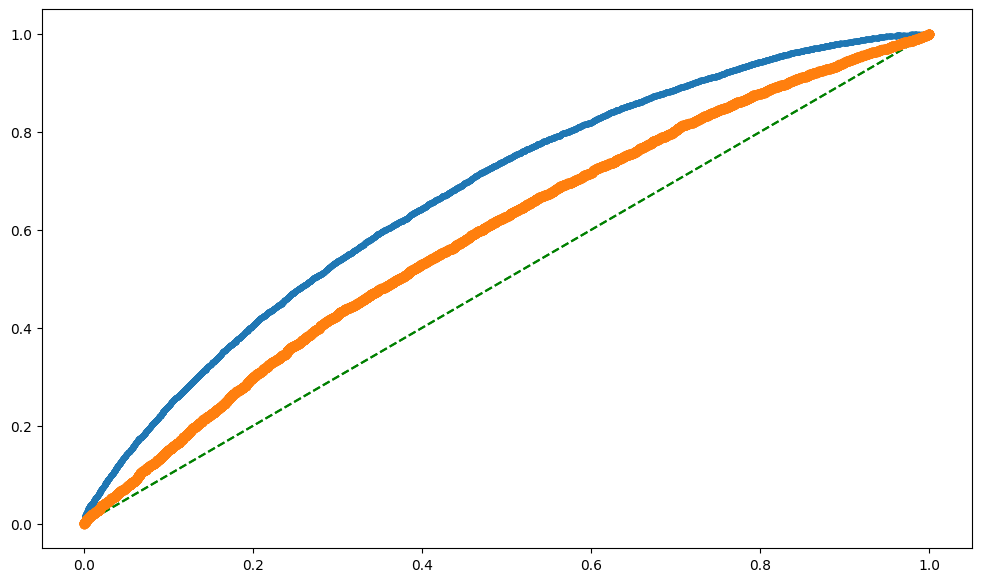

## 9. Quadratic Discriminant Analysis

In [15]:
model = QuadraticDiscriminantAnalysis()
qda_model = model.fit(x_train, y_train)
qda_model

/home/anmol/miniconda3/envs/churn1/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

classification report for training data
              precision    recall  f1-score   support

           0       0.87      0.03      0.05     24855
           1       0.29      0.99      0.45      9971

    accuracy                           0.30     34826
   macro avg       0.58      0.51      0.25     34826
weighted avg       0.70      0.30      0.17     34826



classification report for testing data
              precision    recall  f1-score   support

           0       0.79      0.02      0.05     10652
           1       0.29      0.98      0.45      4274

    accuracy                           0.30     14926
   macro avg       0.54      0.50      0.25     14926
weighted avg       0.64      0.30      0.16     14926



the model score for training data is  0.303
the model score for testing data is  0.2993




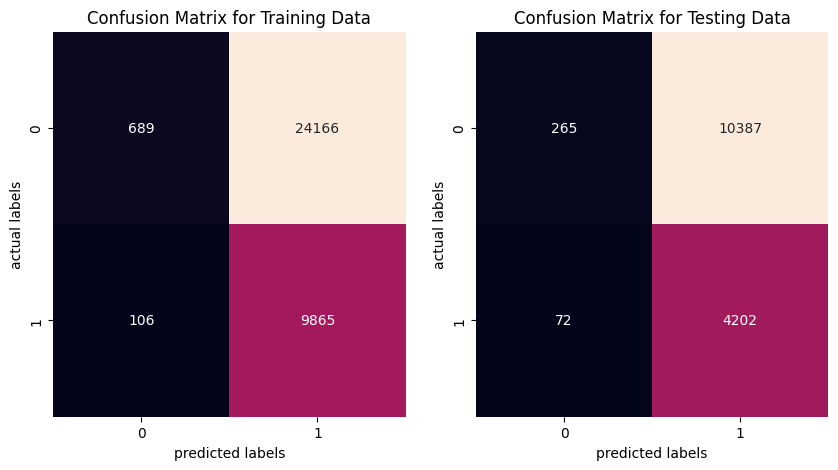

In [16]:
model_performance(qda_model , x_train, y_train, x_test, y_test)

AUC Score for Model on Training Data is 0.6058
AUC Score for Model on Testing Data is 0.576


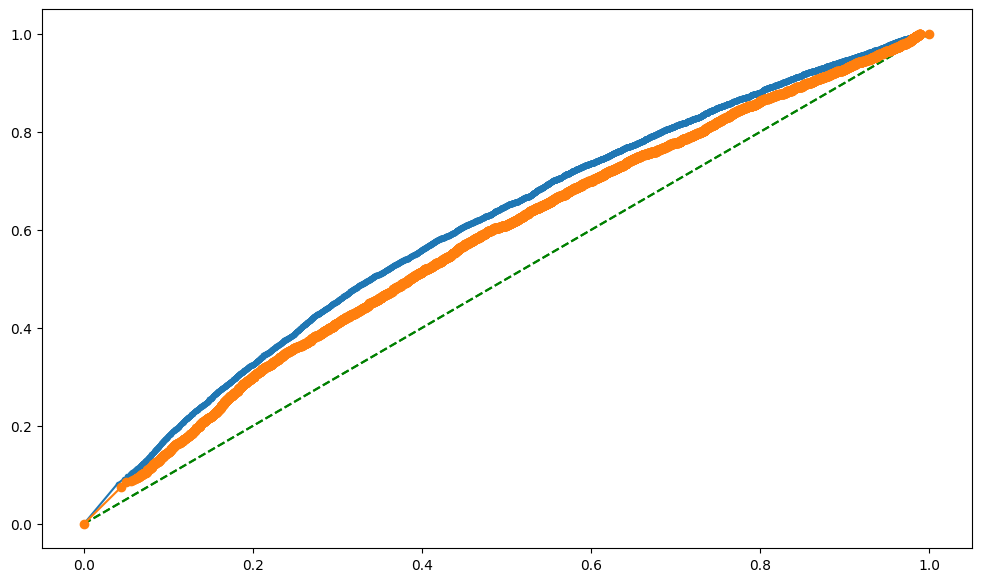

In [17]:
roc_score_auc_curve(qda_model, x_train, y_train, x_test, y_test)

## Light Gradient Boosting

In [22]:
# Initialize a LightGBM Classifier with 'auc' as the evaluation metric 
lgb_model = LGBMClassifier(metric='recall') 
  
# Fit the model on the training data 
lgb_model.fit(x_train, y_train) 
  
# # Make predictions on the training and validation sets 
# y_train = model.predict(X_train) 
# y_val = model.predict(X_val) 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9971, number of negative: 24855
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4984
[LightGBM] [Info] Number of data points in the train set: 34826, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.286309 -> initscore=-0.913378
[LightGBM] [Info] Start training from score -0.913378


LGBMClassifier(metric='recall')

classification report for training data
              precision    recall  f1-score   support

           0       0.76      0.98      0.86     24855
           1       0.84      0.21      0.34      9971

    accuracy                           0.76     34826
   macro avg       0.80      0.60      0.60     34826
weighted avg       0.78      0.76      0.71     34826



classification report for testing data
              precision    recall  f1-score   support

           0       0.73      0.96      0.83     10652
           1       0.59      0.13      0.21      4274

    accuracy                           0.73     14926
   macro avg       0.66      0.55      0.52     14926
weighted avg       0.69      0.73      0.66     14926



the model score for training data is  0.7629
the model score for testing data is  0.7251




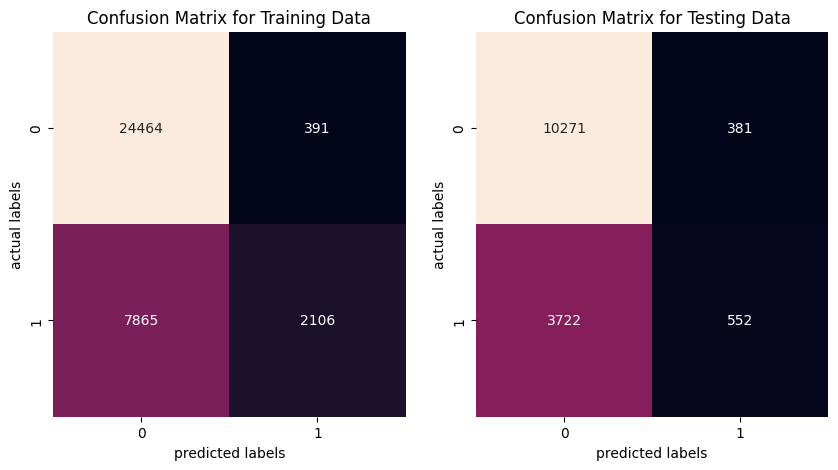

In [23]:
model_performance(lgb_model , x_train, y_train, x_test, y_test)

AUC Score for Model on Training Data is 0.8068
AUC Score for Model on Testing Data is 0.678


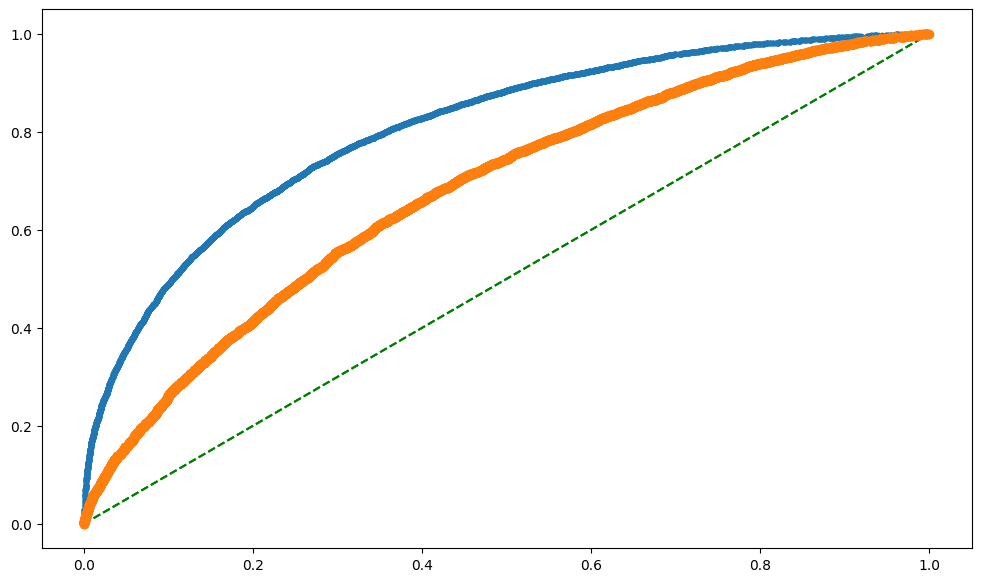

In [24]:
roc_score_auc_curve(lgb_model, x_train, y_train, x_test, y_test)